# **Multicolinealidad**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.stats.mstats import winsorize
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error

In [ ]:
df = pd.read_csv("abalone.data",header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
df = df.rename(columns={0:"Sex",1:"Length",2:"Diameter",3:"Height",4:"Whole_weight",5:"Shucked_weight",6:"Viscera_weight",7:"Shell_weight",8:"Rings"})
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
df.shape

(4177, 9)

In [ ]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

In [ ]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


## Generación del modelo

In [ ]:
x = df[['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight','Viscera_weight', 'Shell_weight']]
y = df["Rings"]

In [ ]:
x = sm.add_constant(x)
model = sm.OLS(y,x)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     665.2
Date:                Fri, 20 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:53:20   Log-Likelihood:                -9250.0
No. Observations:                4177   AIC:                         1.852e+04
Df Residuals:                    4169   BIC:                         1.857e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.9852      0.269     11.

In [ ]:
print(model.params)

const              2.985154
Length            -1.571897
Diameter          13.360916
Height            11.826072
Whole_weight       9.247414
Shucked_weight   -20.213913
Viscera_weight    -9.829675
Shell_weight       8.576242
dtype: float64


In [ ]:
ypred = model.predict(x)

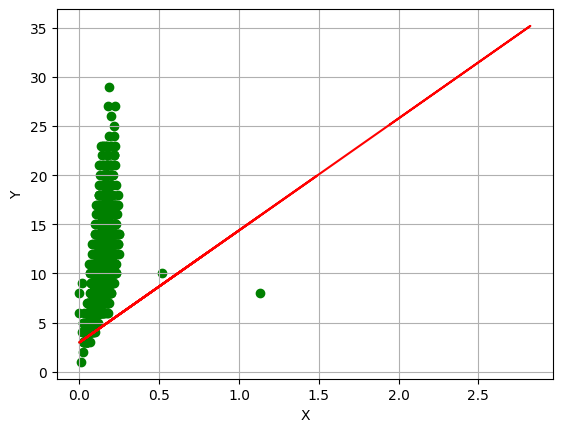

In [ ]:
betas = model.params.to_numpy()
ecuacion = betas[0] + x*betas[1] + x*betas[2] + x*betas[3] + x*betas[4] + x*betas[5] + x*betas[6] + x*betas[7]
plt.scatter(df['Height'],y,color="green")
plt.plot(x,ecuacion, color="red")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()

## Identificación de puntos influyentes y no influyentes

In [ ]:
influence = model.get_influence()
h_mat = influence.hat_matrix_diag
print(h_mat)

[0.00089205 0.00076875 0.00072514 ... 0.00160134 0.00103437 0.0033281 ]


Text(0, 0.5, 'Valor de la matriz Hat')

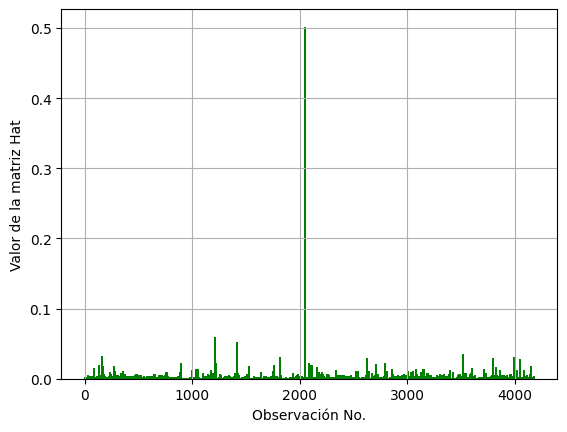

In [ ]:
plt.bar(df.index, h_mat, width=20, color="green")
plt.grid()
plt.xlabel("Observación No.")
plt.ylabel("Valor de la matriz Hat")

In [ ]:
map = sorted(list(enumerate(h_mat)),key=lambda item: item[1], reverse=True)
max_value_indexes = [item[0] for item in map]
most10 = max_value_indexes[:10]
print("Valores con más leverage:")
print(df.iloc[most10])

Valores con más leverage:
     Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
2051   F   0.455     0.355   1.130        0.5940          0.3320   
1210   I   0.185     0.375   0.120        0.4645          0.1960   
1417   M   0.705     0.565   0.515        2.2100          1.1075   
3518   M   0.710     0.570   0.195        1.3480          0.8985   
163    F   0.725     0.560   0.210        2.1410          0.6500   
3996   I   0.315     0.230   0.000        0.1340          0.0575   
1812   M   0.650     0.485   0.160        1.7395          0.5715   
2627   I   0.275     0.205   0.070        0.1055          0.4950   
3800   M   0.740     0.580   0.205        2.3810          0.8155   
4052   M   0.625     0.470   0.145        1.7855          0.6750   

      Viscera_weight  Shell_weight  Rings  
2051          0.1160        0.1335      8  
1210          0.1045        0.1500      6  
1417          0.4865        0.5120     10  
3518          0.4435        0.4535     11  
163  

In [ ]:
np.set_printoptions(suppress=True)
cooks = influence.cooks_distance[0]
print(cooks[:10])

[0.00087893 0.0000011  0.00006288 0.0000137  0.         0.00000042
 0.00223236 0.00049142 0.00000104 0.00135537]


In [ ]:
print(influence.summary_frame())

      dfb_const  dfb_Length  dfb_Diameter  dfb_Height  dfb_Whole_weight  \
0      0.013647   -0.032927      0.045769   -0.048025          0.010240   
1     -0.001956    0.000391      0.000189    0.000044          0.000010   
2      0.009360    0.001597     -0.007949    0.001964         -0.006124   
3      0.002439   -0.008192      0.008150    0.001118         -0.000097   
4      0.000109   -0.000049      0.000021   -0.000022          0.000027   
...         ...         ...           ...         ...               ...   
4172  -0.001359   -0.001517      0.002022    0.001833         -0.002014   
4173  -0.001104    0.002819     -0.002169   -0.001326         -0.000042   
4174   0.002614    0.006257     -0.002471   -0.024792          0.004487   
4175  -0.001575    0.001016     -0.000027   -0.001537         -0.003201   
4176   0.006267    0.000073     -0.003912   -0.000831          0.004942   

      dfb_Shucked_weight  dfb_Viscera_weight  dfb_Shell_weight       cooks_d  \
0              -0.0

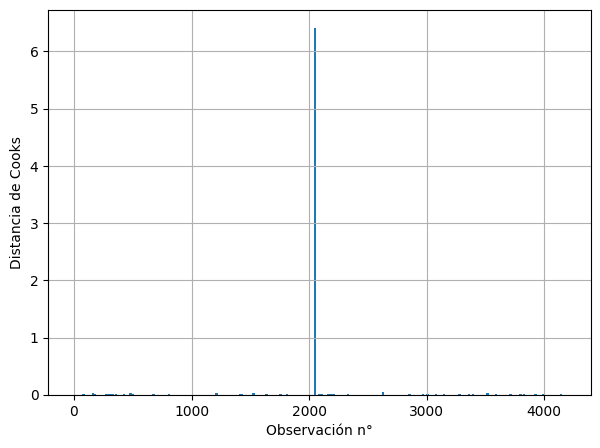

In [ ]:
plt.figure(figsize=(7,5))
plt.bar(df.index, cooks, width=20)
plt.xlabel("Observación n°")
plt.ylabel("Distancia de Cooks")
plt.grid()

In [ ]:
map = sorted(list(enumerate(cooks)), key=lambda item:item[1], reverse=True)
max_value_indexes = [item[0] for item in map]
print("Observaciones con la mayor distancia de Cooks")
print(df.iloc[max_value_indexes[:10]])

Observaciones con la mayor distancia de Cooks
     Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
2051   F   0.455     0.355   1.130        0.5940          0.3320   
2627   I   0.275     0.205   0.070        0.1055          0.4950   
480    F   0.700     0.585   0.185        1.8075          0.7055   
3518   M   0.710     0.570   0.195        1.3480          0.8985   
1528   M   0.725     0.575   0.240        2.2100          1.3510   
1210   I   0.185     0.375   0.120        0.4645          0.1960   
1216   I   0.310     0.225   0.070        0.1055          0.4350   
163    F   0.725     0.560   0.210        2.1410          0.6500   
2108   M   0.665     0.535   0.225        2.1835          0.7535   
81     M   0.620     0.510   0.175        1.6150          0.5105   

      Viscera_weight  Shell_weight  Rings  
2051          0.1160        0.1335      8  
2627          0.0190        0.0315      5  
480           0.3215        0.4750     29  
3518          0.4435        0

In [ ]:
prom_cooks = np.mean(cooks)
print(prom_cooks)

0.0018730877579285728


In [ ]:
mean_cooks_list = [prom_cooks for i in df.index]
cooks_limites = [4/len(cooks) for i in df.index]

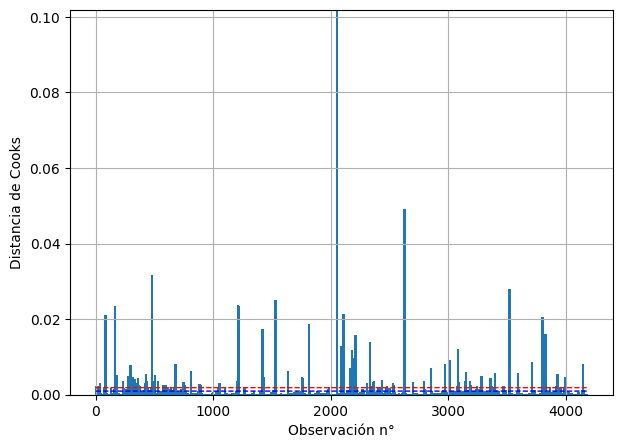

In [ ]:
plt.figure(figsize=(7,5))
plt.bar(df.index, cooks, width=20)
plt.plot(df.index, mean_cooks_list, color="red", linestyle="--", linewidth=1)
plt.plot(df.index, cooks_limites, color="blue", linestyle="--", linewidth=1)
plt.xlabel("Observación n°")
plt.ylabel("Distancia de Cooks")
plt.ylim(top=max(mean_cooks_list + cooks_limites)+ 1e-1)
plt.grid()

In [ ]:
puntos_influyentes = df.index[cooks > 4/len(cooks)]
print(puntos_influyentes[:10])

Int64Index([6, 9, 32, 33, 36, 67, 72, 81, 83, 85], dtype='int64')


In [ ]:
df.iloc[puntos_influyentes,:].head(10)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19
32,M,0.665,0.525,0.165,1.3380,0.5515,0.3575,0.350,18
33,F,0.680,0.550,0.175,1.7980,0.8150,0.3925,0.455,19
36,F,0.540,0.475,0.155,1.2170,0.5305,0.3075,0.340,16
67,F,0.595,0.495,0.185,1.2850,0.4160,0.2240,0.485,13
72,F,0.595,0.475,0.170,1.2470,0.4800,0.2250,0.425,20
81,M,0.620,0.510,0.175,1.6150,0.5105,0.1920,0.675,12
83,M,0.595,0.475,0.160,1.3175,0.4080,0.2340,0.580,21
85,F,0.570,0.465,0.180,1.2950,0.3390,0.2225,0.440,12


In [ ]:
puntos_noinfluyentes = df.index[cooks < 4/len(cooks)]
print(puntos_noinfluyentes[:10])

Int64Index([0, 1, 2, 3, 4, 5, 7, 8, 10, 11], dtype='int64')


In [ ]:
df.iloc[puntos_noinfluyentes,:].head(10)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
10,F,0.525,0.380,0.140,0.6065,0.1940,0.1475,0.210,14
11,M,0.430,0.350,0.110,0.4060,0.1675,0.0810,0.135,10


## Identificación de outliers

In [ ]:
lim1 = x.mean() + 3*x.std()
lim2 = x.mean() - 3*x.std()
print("Limite superior:",lim1)
print("\nLimite inferior:",lim2)
print("\nNúmero de outliers:",x[(x>lim1)|(x<lim2)].shape)

Limite superior: const             1.000000
Length            0.884271
Diameter          0.705601
Height            0.264998
Whole_weight      2.299909
Shucked_weight    1.025256
Viscera_weight    0.509436
Shell_weight      0.656439
dtype: float64

Limite inferior: const             1.000000
Length            0.163713
Diameter          0.110162
Height            0.014035
Whole_weight     -0.642425
Shucked_weight   -0.306521
Viscera_weight   -0.148249
Shell_weight     -0.178777
dtype: float64

Número de outliers: (4177, 8)


In [ ]:
q1 = x.quantile(0.25)
q3 = x.quantile(0.75)
rango = q3-q1

print("Q1:",q1)
print("\nQ3:",q3)
print("\nRango intercuartílico:",rango)

outliers_riq = (x < q1-1.5*rango) | (x>q3+1.5*rango)
print("\nNúmero de outliers:",x[outliers_riq].shape)

Q1: const             1.0000
Length            0.4500
Diameter          0.3500
Height            0.1150
Whole_weight      0.4415
Shucked_weight    0.1860
Viscera_weight    0.0935
Shell_weight      0.1300
Name: 0.25, dtype: float64

Q3: const             1.000
Length            0.615
Diameter          0.480
Height            0.165
Whole_weight      1.153
Shucked_weight    0.502
Viscera_weight    0.253
Shell_weight      0.329
Name: 0.75, dtype: float64

Rango intercuartílico: const             0.0000
Length            0.1650
Diameter          0.1300
Height            0.0500
Whole_weight      0.7115
Shucked_weight    0.3160
Viscera_weight    0.1595
Shell_weight      0.1990
dtype: float64

Número de outliers: (4177, 8)


## Estandarización de los datos

In [ ]:
x = df[['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight','Viscera_weight', 'Shell_weight']]
scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(x)
print("Valores máximos:",scaler.data_max_)
print("\nTransformaciones:")
print(scaler.transform(x),"\n")
x_transformed1 = scaler.transform(x)

Valores máximos: [0.815  0.65   1.13   2.8255 1.488  0.76   1.005 ]

Transformaciones:
[[ 0.02702703  0.04201681 -0.83185841 ... -0.69939475 -0.73535221
  -0.70403587]
 [-0.25675676 -0.29411765 -0.84070796 ... -0.86751849 -0.87360105
  -0.86347783]
 [ 0.22972973  0.22689076 -0.76106195 ... -0.65635508 -0.62870309
  -0.58445441]
 ...
 [ 0.41891892  0.41176471 -0.63716814 ... -0.29455279 -0.24423963
  -0.38913802]
 [ 0.48648649  0.44537815 -0.73451327 ... -0.28715535 -0.31402238
  -0.41305431]
 [ 0.71621622  0.68067227 -0.65486726 ...  0.27034297 -0.00987492
  -0.01644245]] 



In [ ]:
scaler2 = StandardScaler()
scaler2.fit(x)
print("Promedios:",scaler2.mean_)
print("\nTransformaciones:")
print(scaler2.transform(x),"\n")
x_transformed2 = scaler2.transform(x)

Promedios: [0.5239921  0.40788125 0.1395164  0.82874216 0.35936749 0.18059361
 0.23883086]

Transformaciones:
[[-0.57455813 -0.43214879 -1.06442415 ... -0.60768536 -0.72621157
  -0.63821689]
 [-1.44898585 -1.439929   -1.18397831 ... -1.17090984 -1.20522124
  -1.21298732]
 [ 0.05003309  0.12213032 -0.10799087 ... -0.4634999  -0.35668983
  -0.20713907]
 ...
 [ 0.6329849   0.67640943  1.56576738 ...  0.74855917  0.97541324
   0.49695471]
 [ 0.84118198  0.77718745  0.25067161 ...  0.77334105  0.73362741
   0.41073914]
 [ 1.54905203  1.48263359  1.32665906 ...  2.64099341  1.78744868
   1.84048058]] 



## Evaluar el modelo con los datos transformados

In [ ]:
x_transformed1 = sm.add_constant(x_transformed1)
model = sm.OLS(y,x_transformed1)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     665.2
Date:                Fri, 20 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:54:14   Log-Likelihood:                -9250.0
No. Observations:                4177   AIC:                         1.852e+04
Df Residuals:                    4169   BIC:                         1.857e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.2796      0.717     17.117      0.0

In [ ]:
x_transformed2 = sm.add_constant(x_transformed2)
model = sm.OLS(y,x_transformed2)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     665.2
Date:                Fri, 20 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:54:14   Log-Likelihood:                -9250.0
No. Observations:                4177   AIC:                         1.852e+04
Df Residuals:                    4169   BIC:                         1.857e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9337      0.034    289.481      0.0

## Multicolinealidad con VIF

Text(0.5, 1.0, 'Coeficientes de correlación de las variables predictoras')

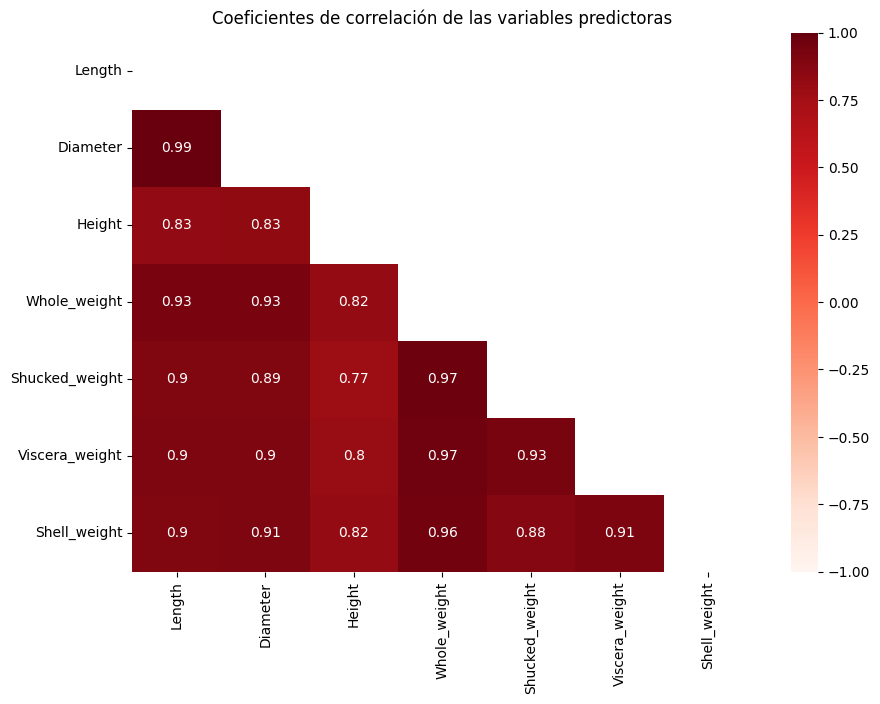

In [ ]:
plt.figure(figsize=(10,7))
x = df[['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight','Viscera_weight', 'Shell_weight']]
triangulo = np.triu(np.ones_like(x.corr(numeric_only=True), dtype="bool"))
sns.heatmap(x.corr(numeric_only=True), annot=True, mask=triangulo, vmin=-1, vmax=1, cmap="Reds")
plt.title("Coeficientes de correlación de las variables predictoras")

In [ ]:
def vif(variables):
  x = df[variables].copy()
  x["intercepto"] = 1

  vif_df = pd.DataFrame()
  vif_df["variable"] = x.columns

  vif_df["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
  vif_df = vif_df[vif_df["variable"] != "intercepto"]

  return vif_df

In [ ]:
def test_model(variables):
  x = df[variables]
  y = df["Rings"]
  scaler = StandardScaler()
  scaler.fit(x)
  x = scaler.transform(x)
  x = sm.add_constant(x)
  model = sm.OLS(y,x)
  model = model.fit()
  ypred = model.predict(x)
  print(model.summary())
  print("\nMSE:", mean_squared_error(y,ypred))

In [ ]:
x_vars = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight','Viscera_weight', 'Shell_weight']
print(vif(x_vars).sort_values("VIF", ascending=False))

         variable         VIF
3    Whole_weight  109.592750
1        Diameter   41.845452
0          Length   40.771813
4  Shucked_weight   28.353191
6    Shell_weight   21.258289
5  Viscera_weight   17.346276
2          Height    3.559939


In [ ]:
test_model(x_vars)

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     665.2
Date:                Fri, 20 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:54:15   Log-Likelihood:                -9250.0
No. Observations:                4177   AIC:                         1.852e+04
Df Residuals:                    4169   BIC:                         1.857e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9337      0.034    289.481      0.0

In [ ]:
x_vars.remove("Whole_weight")
print(vif(x_vars).sort_values("VIF", ascending=False))

         variable        VIF
1        Diameter  41.819755
0          Length  40.763955
4  Viscera_weight  10.697780
3  Shucked_weight   8.852112
5    Shell_weight   7.817781
2          Height   3.558443


In [ ]:
test_model(x_vars)

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     722.1
Date:                Fri, 20 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:54:15   Log-Likelihood:                -9328.3
No. Observations:                4177   AIC:                         1.867e+04
Df Residuals:                    4170   BIC:                         1.871e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9337      0.035    284.137      0.0

In [ ]:
x_vars.remove("Diameter")
print(vif(x_vars).sort_values("VIF", ascending=False))

         variable        VIF
3  Viscera_weight  10.690504
2  Shucked_weight   8.851834
0          Length   8.013867
4    Shell_weight   7.457755
1          Height   3.509983


In [ ]:
test_model(x_vars)

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     851.4
Date:                Fri, 20 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:54:16   Log-Likelihood:                -9347.3
No. Observations:                4177   AIC:                         1.871e+04
Df Residuals:                    4171   BIC:                         1.874e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9337      0.035    282.882      0.0

In [ ]:
x_vars.remove("Viscera_weight")
print(vif(x_vars).sort_values("VIF", ascending=False))

         variable       VIF
0          Length  7.746817
3    Shell_weight  6.598972
2  Shucked_weight  6.114777
1          Height  3.489531


In [ ]:
test_model(x_vars)

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     1064.
Date:                Fri, 20 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:54:16   Log-Likelihood:                -9347.3
No. Observations:                4177   AIC:                         1.870e+04
Df Residuals:                    4172   BIC:                         1.874e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9337      0.035    282.915      0.0